
*   Priyamvada Bhardwaj
*   Snigdha Mohapatra 
*   Mohadese Ghayoomi Jvaninai 





List of things tried-

1. Added 1 layer with zero initial weights(also experimented with number of units this layer should have)
2. Added 1 layer with random weights
3. Added 1 layer with range 0,1 random weights
4. Checking the effects of different weight initilisation after chooing the number of units
5. Checking the effects on weight init on 2 layer network
6. Checking different activation function on single hidden layer with ranadom weigths init
7. Checking diff activation function on 2 layers
8. Checking number of Layers
9. Checking number of units in each layer , with 3 layers model
10. Running  with 2 hiddden layer without any activation fucntion at all
11. plotting images which did not get predicted correctly
12. Little bit experiment wiht plotting with code from tensorflow

Required Imports 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Plotting first 5 images

The Training Label is  5


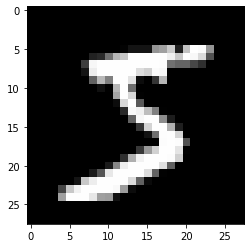

The Training Label is  0


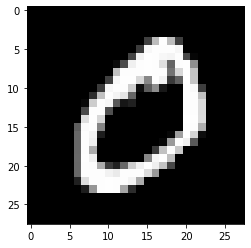

The Training Label is  4


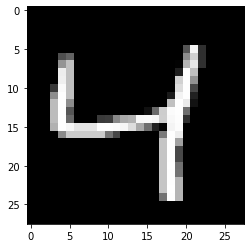

The Training Label is  1


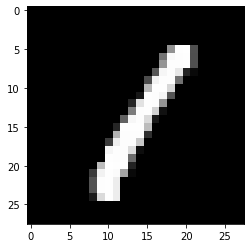

In [ ]:
for i in range(4):
  print("The Training Label is ",train_labels[i] )
  plt.imshow(train_images[i], cmap="Greys_r")
  plt.show()

Basics needed to make it deep, lets add single hidden layer - 

1. Input Layers
2. Output Layer
3. Single Hidden Layer
4. Function - Gonna use Softmax for hiddena and out
5. Weights from input layer to hidden layer, hidden to out
6. Bias from inout to hidden , hidden to out
7. how many units in hidden layer?
8. Loss fucntion

Just to keep a note to myself about Number of epoc, number of steps

7770 rows, we break it into small batches of size 128, this will give us 60 batches.

This will require tf to go through 60 iterations/steps to train to model. If we want to go over this dataset 10 times, set `num_epochs=10` will do the job, or, set `steps=600` should yield the same flow.Learning Rate is step size

Source- https://medium.com/@linda0511ny/tensorflow-train-dataset-by-epochs-or-steps-3839705f307d

Reshaping the train images into 1 single flat row

In [ ]:
# we have 1 rows with 784 column and a shape of [-1] flattens into 1-D .
#At most one component of shape can be -1.
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [ ]:
#declaring some of the hyper parameters
train_steps = 1000
learning_rate = 0.1

With single weights and bias for a layer

In [ ]:
W1 = tf.Variable(np.zeros([784, 10]).astype(np.float32)) #because input are 784 and output units are 10
b1 = tf.Variable(np.zeros(10, dtype=np.float32))
#with single layer
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W1) + b1
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch)) #its the mean of losses over all the batches

#cross entropy- diff between 2 probability distributions, number of bits required to explain the diff
#why cross entropy-better when output fucntion saturates or produces very little gradient like with MSE/MAE
#also cost fucntion should negate the saturation of activation fucntions
        
    grads = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])

    #computing the gradient of loss with respect to the weights and due to back propogation going back and adjusting it
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print(W1)
        print("Loss: {} Accuracy: {}".format(xent, acc))


<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>
Loss: 2.3025853633880615 Accuracy: 0.0859375
<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>
Loss: 0.6714428663253784 Accuracy: 0.8359375
<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
  

In [ ]:
#testing it over
test_preds = tf.argmax(tf.matmul(data.test_data, W1) + b1, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Accuracy with single layer is",acc)

Accuracy with single layer is tf.Tensor(0.9106, shape=(), dtype=float32)


Making it deep with 1 hidden layer.

Added one more set of weights and bias, however checking how many units this layer shouldh ahve hence running it through with number of units.

All weights are initialised as zero.

In [ ]:
#for 1 hidden layer
units = [784,512,350,256 ,128, 50, 10]
for i in units:
  W1 = tf.Variable(np.zeros([784, i],dtype=np.float32))
  b1 = tf.Variable(np.zeros(i, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(np.zeros([i, 10],dtype=np.float32))
  b2 = tf.Variable(np.zeros(10, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.nn.softmax(tf.matmul(img_batch, W1) + b1)
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.nn.softmax(tf.matmul(data.test_data, W1) + b1)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Accuracy with 784 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 512 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 350 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 256 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 128 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with 50 units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with 10 units is 0.11349999904632568


Conclusion-The above output is constant if used with weights set as 0. I think with weights=0 the activation fucntion is not changing, equation is coming as 0 hence there are no changes in weights hence the model is stuck.

If we initialize all weights with zeros then every hidden unit will get zero independent of the input. So, when all the hidden neurons start with the zero weights, then all of them will follow the same gradient and for this reason "it affects only the scale of the weight vector, not the direction".

Also, having zero ( or equal) weights to start with will prevent the network from learning. If all the weights are the same, then the backpropagated errors will be the same, and consequently, all of the weights will be updated by the same amount. To avoid this symmetry problem, the initial weights to the network should be unequal.

Now initilisaing it randomly wiht range of -0.1 to 0.1

In [ ]:
#for 1 hidden layer , but with uniform random weights
units = [784,512,350, 250,128, 50, 10]
for i in units:
  W1 = tf.Variable(tf.random.uniform([784, i], -0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([i], -0.1,0.1, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([i, 10],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Accuracy with 784 units is 0.9190999865531921
Starting new epoch...
Starting new epoch...
Accuracy with 512 units is 0.9182000160217285
Starting new epoch...
Starting new epoch...
Accuracy with 350 units is 0.9179999828338623
Starting new epoch...
Starting new epoch...
Accuracy with 250 units is 0.9182999730110168
Starting new epoch...
Starting new epoch...
Accuracy with 128 units is 0.9157000184059143
Starting new epoch...
Starting new epoch...
Accuracy with 50 units is 0.9144999980926514
Starting new epoch...
Starting new epoch...
Accuracy with 10 units is 0.9097999930381775


conclusion-In above cell outout if the weights are initiliased randomly but within a bound, the accuracy is again almost eqaul to the model without any deep layer.

In [ ]:
#for 1 hidden layer , but with uniform random weights and range is 0,1
units = [784,512,350, 250,128, 50, 10]
for i in units:
  W1 = tf.Variable(tf.random.uniform([784, i], 0,1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([i], 0,1, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([i, 10],0,1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([10],0,1, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with 784 units is 0.9057000279426575
Starting new epoch...
Starting new epoch...
Accuracy with 512 units is 0.9042999744415283
Starting new epoch...
Starting new epoch...
Accuracy with 350 units is 0.9020000100135803
Starting new epoch...
Starting new epoch...
Accuracy with 250 units is 0.9042999744415283
Starting new epoch...
Starting new epoch...
Accuracy with 128 units is 0.9000999927520752
Starting new epoch...
Starting new epoch...
Accuracy with 50 units is 0.8968999981880188
Starting new epoch...
Starting new epoch...
Accuracy with 10 units is 0.8808000087738037


for 1 hidden layer , but with uniform random weights after choosing number of units as 250 since after 
that accuracy somehwat constant but changing the initla weights

reference for weights
https://stackoverflow.com/questions/43489697/tensorflow-weight-initialization
https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary

Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
{'-0.1': 0.917, '0.0': 0.1135, '1e-05': 0.9001, '0.0001': 0.9061, '0.0003': 0.9079, '0.001': 0.911, '0.003': 0.9133, '0.01': 0.9165, '0.03': 0.9167, '0.1': 0.9155, '0.3': 0.9062, '1.0': 0.8785}


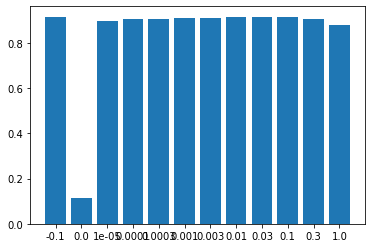

In [ ]:


def weight_variable(shape, w=0.1):
  initial = tf.random.truncated_normal(shape, stddev=w)
  return tf.Variable(initial)

def bias_variable(shape, w=0.1):
  initial = tf.constant(w, shape=shape)
  return tf.Variable(initial)

ws = [ -0.1, 0.0, 0.00001,0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]
dict_for_acc = dict()
import numpy as np
for i in ws:


  W1 = weight_variable([784, 250],i)
  b1 = bias_variable([250],i)
  
  W2 = weight_variable([250, 10],i)
  b2 = bias_variable([10],i)
  

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  #print("Accuracy with {} weights is {}".format(i,acc))
  dict_for_acc[str(i)] = acc.numpy()


print(dict_for_acc)
plt.bar(*zip(*dict_for_acc.items()))
plt.show()


Conclusion- Except for wieghts = 0 it doens't change much. can't conclude on anything.

Weights initilisation with 2 hidden layers, added 1 more set of weights and bias

Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
{'-0.1': 0.9144, '0.0': 0.1135, '1e-05': 0.1135, '0.0001': 0.1135, '0.0003': 0.1135, '0.001': 0.1135, '0.003': 0.8095, '0.01': 0.8975, '0.03': 0.9128, '0.1': 0.9104, '0.3': 0.098, '1.0': 0.098}


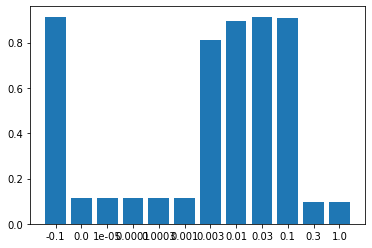

In [ ]:
def weight_variable(shape, w=0.1):
  initial = tf.random.truncated_normal(shape, stddev=w)
  return tf.Variable(initial)

def bias_variable(shape, w=0.1):
  initial = tf.constant(w, shape=shape)
  return tf.Variable(initial)

ws = [ -0.1, 0.0, 0.00001,0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]
dict_for_acc = dict()
import numpy as np
for i in ws:


  W1 = weight_variable([784, 250],i)
  b1 = bias_variable([250],i)
  
  W2 = weight_variable([250, 128],i)
  b2 = bias_variable([128],i)

  W3 = weight_variable([128, 10],i)
  b3 = bias_variable([10],i)
  

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logit2 = tf.matmul(logits1, W2) + b2
        logit3 = tf.matmul(logit2, W3) + b3
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit3, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
  test_preds = tf.argmax(tf.matmul(test_preds_layer_2, W3) + b3, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  #print("Accuracy with {} weights is {}".format(i,acc))
  dict_for_acc[str(i)] = acc.numpy()


print(dict_for_acc)
plt.bar(*zip(*dict_for_acc.items()))
plt.show()


Conclusion- very small weights and very big weights are not performing that well.

Experimenting with activation function

In [ ]:
#for 1 hidden layer , but with uniform weights and sigmoid activation function on first layer
def activation_fun(x,name):
  if name == 'relu':
    return tf.nn.relu(x)
  elif name == 'sigmoid':
    return tf.nn.sigmoid(x)
  elif name == 'softmax':
    return tf.nn.softmax(x)
  elif name == 'tanh':
    return tf.nn.tanh(x)
  else:
    return x
fun = ['relu', 'sigmoid', 'softmax', 'tanh']

for i in fun:
  W1 = tf.Variable(tf.random.uniform([784, 250], -0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([250], -0.1,0.1, dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.uniform([250, 10],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = (tf.matmul(img_batch, W1) + b1)
        logits1 = activation_fun(logits1,i)
        logit = tf.matmul(logits1, W2) + b2
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

  test_preds_layer_1 = (tf.matmul(data.test_data, W1) + b1)
  test_preds_layer_1 = activation_fun(test_preds_layer_1,i)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_1, W2) + b2, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} function is {}".format(i, acc))

Starting new epoch...
Starting new epoch...
Accuracy with relu function is 0.9372000098228455
Starting new epoch...
Starting new epoch...
Accuracy with sigmoid function is 0.8981000185012817
Starting new epoch...
Starting new epoch...
Accuracy with softmax function is 0.11410000175237656
Starting new epoch...
Starting new epoch...
Accuracy with tanh function is 0.9258999824523926


In [ ]:
#Conclusion- ReLU did the best. Why softmax did so bad? How sigmoid was doing so better before ReLU?
# sigmoid va softmax for multiclass and multi label

Object `ReLU` not found.


Doing the same with 2 layers

Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
{'relu': 0.9479, 'sigmoid': 0.8395, 'softmax': 0.1135, 'tanh': 0.9354}


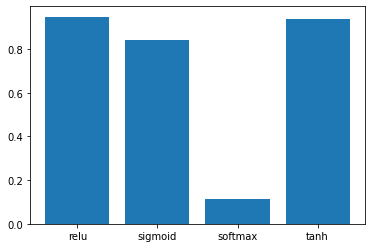

In [ ]:
dict_for_acc = dict()
fun = ['relu', 'sigmoid', 'softmax', 'tanh']

for i in fun:
  W1 = tf.Variable(tf.random.uniform([784, 250], -0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([250], -0.1,0.1, dtype=np.float32))

  
  W2 = tf.Variable(tf.random.uniform([250, 128],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([128],-0.1,0.1, dtype=np.float32))

   #for out layer
  W3 = tf.Variable(tf.random.uniform([128, 10],-0.1,0.1,dtype=np.float32))
  b3 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))
  

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logits1 = activation_fun(logits1,i)
        logit2 = tf.matmul(logits1, W2) + b2
        logit2 = activation_fun(logit2,i)
        logit3 = tf.matmul(logit2, W3) + b3
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit3, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds_layer_1 = activation_fun(test_preds_layer_1,i)
  test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
  test_preds_layer_2 = activation_fun(test_preds_layer_2,i)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_2, W3) + b3, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  #print("Accuracy with {} weights is {}".format(i,acc))
  dict_for_acc[str(i)] = acc.numpy()


print(dict_for_acc)
plt.bar(*zip(*dict_for_acc.items()))
plt.show()


Conclusion- Again ReLU is best here.

For  Number of Layes except sigmoid 2 layers seemed to do little bettwe than 1 layer.

Trying more than 2 hiden layers

Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
{'relu': 0.9506, 'sigmoid': 0.1028, 'softmax': 0.1135, 'tanh': 0.9405}


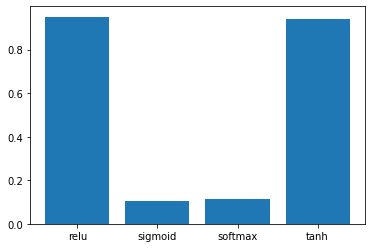

In [ ]:
dict_for_acc = dict()
fun = ['relu', 'sigmoid', 'softmax', 'tanh']

for i in fun:
  W1 = tf.Variable(tf.random.uniform([784, 250], -0.1,0.1,dtype=np.float32))
  b1 = tf.Variable(tf.random.uniform([250], -0.1,0.1, dtype=np.float32))

  
  W2 = tf.Variable(tf.random.uniform([250, 128],-0.1,0.1,dtype=np.float32))
  b2 = tf.Variable(tf.random.uniform([128],-0.1,0.1, dtype=np.float32))

   #for out layer
  W3 = tf.Variable(tf.random.uniform([128, 60],-0.1,0.1,dtype=np.float32))
  b3 = tf.Variable(tf.random.uniform([60],-0.1,0.1, dtype=np.float32))
  
  W4 = tf.Variable(tf.random.uniform([60, 10],-0.1,0.1,dtype=np.float32))
  b4 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logits1 = activation_fun(logits1,i)
        logit2 = tf.matmul(logits1, W2) + b2
        logit2 = activation_fun(logit2,i)
        logit3 = tf.matmul(logit2, W3) + b3
        logit3 = activation_fun(logit3,i)
        logit4 = tf.matmul(logit3, W4) + b4
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit4, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

    grads4 = tape.gradient(xent, [W4, b4])
    W4.assign_sub(learning_rate * grads4[0])
    b4.assign_sub(learning_rate * grads4[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds_layer_1 = activation_fun(test_preds_layer_1,i)
  test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
  test_preds_layer_2 = activation_fun(test_preds_layer_2,i)
  test_preds_layer_3 = tf.matmul(test_preds_layer_2, W3) + b3
  test_preds_layer_3 = activation_fun(test_preds_layer_3,i)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_3, W4) + b4, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  #print("Accuracy with {} weights is {}".format(i,acc))
  dict_for_acc[str(i)] = acc.numpy()


print(dict_for_acc)
plt.bar(*zip(*dict_for_acc.items()))
plt.show()


Conclusion- Increasing number of Layers seems to increase the accuracy

Does rnage of weights and choice of activation fucntion has a relation?

Experimenting with number of units in each layer with relu

In [ ]:
import itertools
#adding one more layer, 3 hidden layer
#for hidden layer
units_i = [784,512, 128, 50, 10]
units_j = [784,512, 128, 50, 10]
units_k = [784,512, 128, 50, 10]
for x in list(itertools.product(units_i,units_j,units_k)):
  W1 = tf.Variable(tf.random.normal([784, x[0]],dtype=np.float32))
  b1 = tf.Variable(np.zeros(x[0], dtype=np.float32))

  #for out layer
  W2 = tf.Variable(tf.random.normal([x[0], x[1]],dtype=np.float32))
  b2 = tf.Variable(np.zeros(x[1], dtype=np.float32))

  #for out layer
  W3 = tf.Variable(tf.random.normal([x[1], x[2]],dtype=np.float32))
  b3 = tf.Variable(np.zeros(x[2], dtype=np.float32))

  #for final layer
  W4 = tf.Variable(tf.random.normal([x[2], 10],dtype=np.float32))
  b4 = tf.Variable(np.zeros(10, dtype=np.float32))

  for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logits1 = tf.nn.relu(logits1)
        logit2 = tf.matmul(logits1, W2) + b2
        logit2 = tf.nn.relu(logit2)
        logit3 = tf.matmul(logit2, W3) + b3
        logit3 = tf.nn.relu(logit3)
        logit4 = tf.matmul(logit3, W4) + b4
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit4, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

    grads4 = tape.gradient(xent, [W4, b4])
    W4.assign_sub(learning_rate * grads4[0])
    b4.assign_sub(learning_rate * grads4[1])

  test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
  test_preds_layer_1 = tf.nn.relu(test_preds_layer_1)
  test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
  test_preds_layer_2 = tf.nn.relu(test_preds_layer_2)
  test_preds_layer_3 = tf.matmul(test_preds_layer_2, W3) + b3
  test_preds_layer_3 = tf.nn.relu(test_preds_layer_3)
  test_preds = tf.argmax(tf.matmul(test_preds_layer_3, W4) + b4, axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
  print("Accuracy with {} units is {}".format(x, acc))

Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 784) units is 0.09799999743700027
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 512) units is 0.09799999743700027
Starting new epoch...
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 128) units is 0.09799999743700027
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 50) units is 0.09799999743700027
Starting new epoch...
Starting new epoch...
Accuracy with (784, 784, 10) units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 784) units is 0.09799999743700027
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 512) units is 0.09799999743700027
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 128) units is 0.09799999743700027
Starting new epoch...
Starting new epoch...
Accuracy with (784, 512, 50) units is 0.11349999904632568
Starting new epoch...
Starting new epoch...
Starting n

Also, reflect on the Tensorflow interface: If you followed the tutorials you were asked to, you have been using a very low-level approach to defining models as well as their training and evaluation. Which of these parts do you think should be wrapped in higher-level interfaces? Do you feel like you are forced to provide any redundant information when defining your model? Any features you are missing so far?

Adding the layers and activation fucntions should be in a higer level wrapper. weights again and again in each layer.

Features like k-fold cross validation and grid search to find the best parameters.

Checking with without any activation fucntion at all

In [ ]:
W1 = tf.Variable(tf.random.uniform([784, 250], -0.1,0.1,dtype=np.float32))
b1 = tf.Variable(tf.random.uniform([250], -0.1,0.1, dtype=np.float32))

  
W2 = tf.Variable(tf.random.uniform([250, 128],-0.1,0.1,dtype=np.float32))
b2 = tf.Variable(tf.random.uniform([128],-0.1,0.1, dtype=np.float32))

   
W3 = tf.Variable(tf.random.uniform([128, 60],-0.1,0.1,dtype=np.float32))
b3 = tf.Variable(tf.random.uniform([60],-0.1,0.1, dtype=np.float32))
#for out layer  
W4 = tf.Variable(tf.random.uniform([60, 10],-0.1,0.1,dtype=np.float32))
b4 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        #logits1 = tf.nn.relu(logits1)
        logit2 = tf.matmul(logits1, W2) + b2
        #logit2 = tf.nn.relu(logit2)
        logit3 = tf.matmul(logit2, W3) + b3
        #logit3 = tf.nn.relu(logit3)
        logit4 = tf.matmul(logit3, W4) + b4
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit4, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

    grads4 = tape.gradient(xent, [W4, b4])
    W4.assign_sub(learning_rate * grads4[0])
    b4.assign_sub(learning_rate * grads4[1])

test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
#test_preds_layer_1 = tf.nn.relu(test_preds_layer_1)
test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
#test_preds_layer_2 = tf.nn.relu(test_preds_layer_2)
test_preds_layer_3 = tf.matmul(test_preds_layer_2, W3) + b3
#test_preds_layer_3 = tf.nn.relu(test_preds_layer_3)
test_preds = tf.argmax(tf.matmul(test_preds_layer_3, W4) + b4, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Accuracy is {}".format(acc))



Starting new epoch...
Starting new epoch...
Accuracy is 0.9172000288963318


Conclusion- linear?

Bonus Part- see which images are misclassified

In [ ]:
W1 = tf.Variable(tf.random.uniform([784, 250], -0.1,0.1,dtype=np.float32))
b1 = tf.Variable(tf.random.uniform([250], -0.1,0.1, dtype=np.float32))

  
W2 = tf.Variable(tf.random.uniform([250, 128],-0.1,0.1,dtype=np.float32))
b2 = tf.Variable(tf.random.uniform([128],-0.1,0.1, dtype=np.float32))

   
W3 = tf.Variable(tf.random.uniform([128, 60],-0.1,0.1,dtype=np.float32))
b3 = tf.Variable(tf.random.uniform([60],-0.1,0.1, dtype=np.float32))
#for out layer  
W4 = tf.Variable(tf.random.uniform([60, 10],-0.1,0.1,dtype=np.float32))
b4 = tf.Variable(tf.random.uniform([10],-0.1,0.1, dtype=np.float32))

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        logits1 = tf.matmul(img_batch, W1) + b1
        logits1 = tf.nn.relu(logits1)
        logit2 = tf.matmul(logits1, W2) + b2
        logit2 = tf.nn.relu(logit2)
        logit3 = tf.matmul(logit2, W3) + b3
        logit3 = tf.nn.relu(logit3)
        logit4 = tf.matmul(logit3, W4) + b4
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logit4, labels=lbl_batch))
        
        
    grads1 = tape.gradient(xent, [W1, b1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])

      
    grads2 = tape.gradient(xent, [W2, b2])
    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])

    grads3 = tape.gradient(xent, [W3, b3])
    W3.assign_sub(learning_rate * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])

    grads4 = tape.gradient(xent, [W4, b4])
    W4.assign_sub(learning_rate * grads4[0])
    b4.assign_sub(learning_rate * grads4[1])

test_preds_layer_1 = tf.matmul(data.test_data, W1) + b1
test_preds_layer_1 = tf.nn.relu(test_preds_layer_1)
test_preds_layer_2 = tf.matmul(test_preds_layer_1, W2) + b2
test_preds_layer_2 = tf.nn.relu(test_preds_layer_2)
test_preds_layer_3 = tf.matmul(test_preds_layer_2, W3) + b3
test_preds_layer_3 = tf.nn.relu(test_preds_layer_3)
test_preds = tf.argmax(tf.matmul(test_preds_layer_3, W4) + b4, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Accuracy is {}".format(acc))



Starting new epoch...
Starting new epoch...
Accuracy is 0.9495999813079834


In [ ]:
equal_pred = tf.equal(test_preds, data.test_labels)

In [ ]:
print(equal_pred)

tf.Tensor([ True  True  True ...  True  True  True], shape=(10000,), dtype=bool)


In [ ]:
not_equal_pred = tf.not_equal(test_preds, data.test_labels)
not_equal_pred

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

In [ ]:
#plotting all mis classification within first 500 images

The Training Label is  5
The Predicted Label is  tf.Tensor(6, shape=(), dtype=int32)


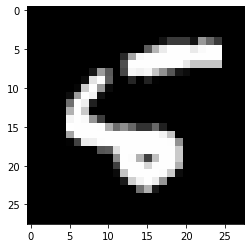

The Training Label is  4
The Predicted Label is  tf.Tensor(6, shape=(), dtype=int32)


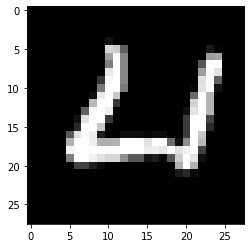

The Training Label is  2
The Predicted Label is  tf.Tensor(9, shape=(), dtype=int32)


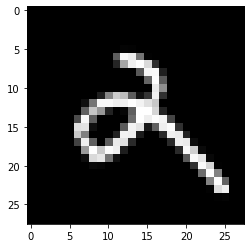

The Training Label is  8
The Predicted Label is  tf.Tensor(7, shape=(), dtype=int32)


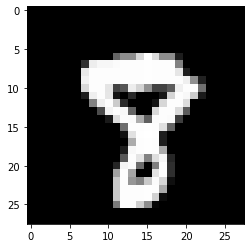

The Training Label is  9
The Predicted Label is  tf.Tensor(8, shape=(), dtype=int32)


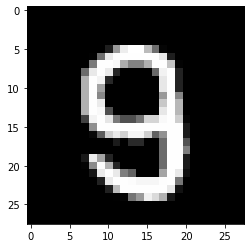

The Training Label is  3
The Predicted Label is  tf.Tensor(5, shape=(), dtype=int32)


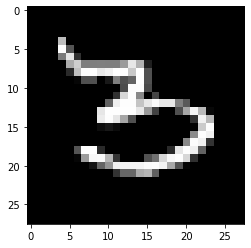

The Training Label is  4
The Predicted Label is  tf.Tensor(2, shape=(), dtype=int32)


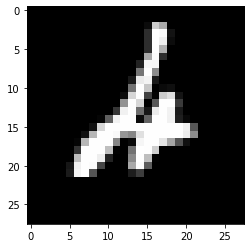

The Training Label is  8
The Predicted Label is  tf.Tensor(1, shape=(), dtype=int32)


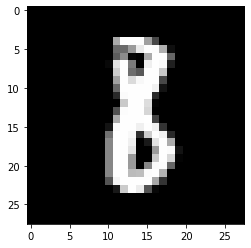

The Training Label is  6
The Predicted Label is  tf.Tensor(0, shape=(), dtype=int32)


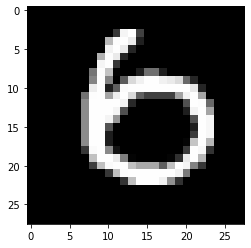

The Training Label is  4
The Predicted Label is  tf.Tensor(1, shape=(), dtype=int32)


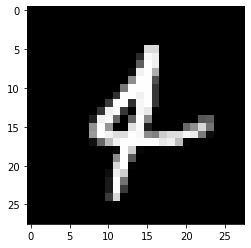

The Training Label is  3
The Predicted Label is  tf.Tensor(5, shape=(), dtype=int32)


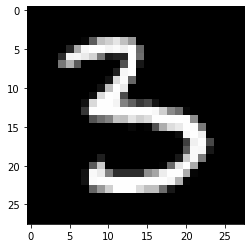

The Training Label is  9
The Predicted Label is  tf.Tensor(7, shape=(), dtype=int32)


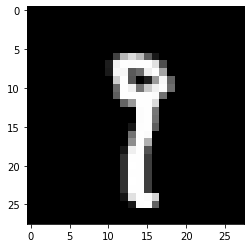

The Training Label is  2
The Predicted Label is  tf.Tensor(7, shape=(), dtype=int32)


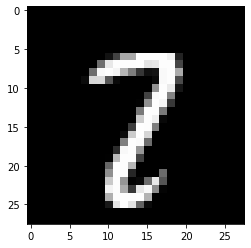

The Training Label is  5
The Predicted Label is  tf.Tensor(3, shape=(), dtype=int32)


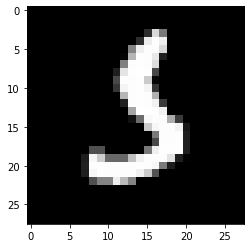

The Training Label is  6
The Predicted Label is  tf.Tensor(4, shape=(), dtype=int32)


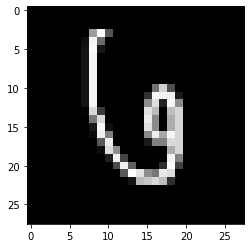

The Training Label is  3
The Predicted Label is  tf.Tensor(7, shape=(), dtype=int32)


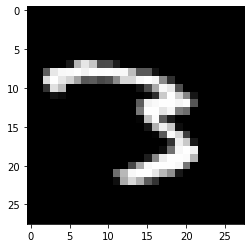

The Training Label is  8
The Predicted Label is  tf.Tensor(5, shape=(), dtype=int32)


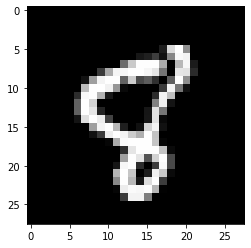

The Training Label is  5
The Predicted Label is  tf.Tensor(3, shape=(), dtype=int32)


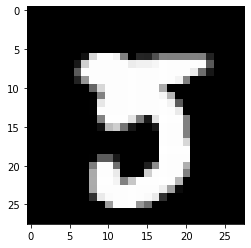

The Training Label is  8
The Predicted Label is  tf.Tensor(7, shape=(), dtype=int32)


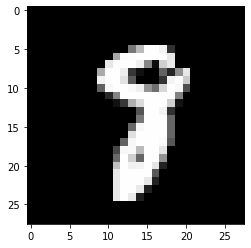

The Training Label is  6
The Predicted Label is  tf.Tensor(0, shape=(), dtype=int32)


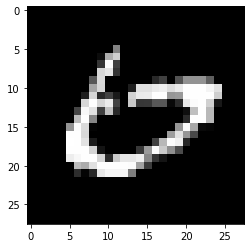

The Training Label is  5
The Predicted Label is  tf.Tensor(8, shape=(), dtype=int32)


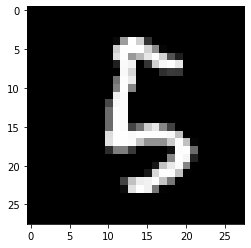

The Training Label is  8
The Predicted Label is  tf.Tensor(0, shape=(), dtype=int32)


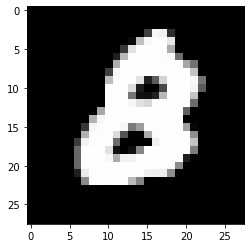

In [ ]:
for i in range(500):
  if test_preds[i] != data.test_labels[i]:
    print("The Training Label is ",test_labels[i])
    print("The Predicted Label is ",test_preds[i])
    plt.imshow(test_images[i], cmap="Greys_r")
    plt.show()


In [ ]:
#Below code is taken from https://www.tensorflow.org/tutorials/keras/classification

# This is just to make it look nice

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = (predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


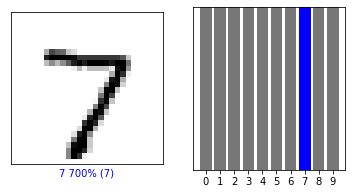

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, test_preds[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, test_preds[i],  test_labels)
plt.show()


In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = (predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


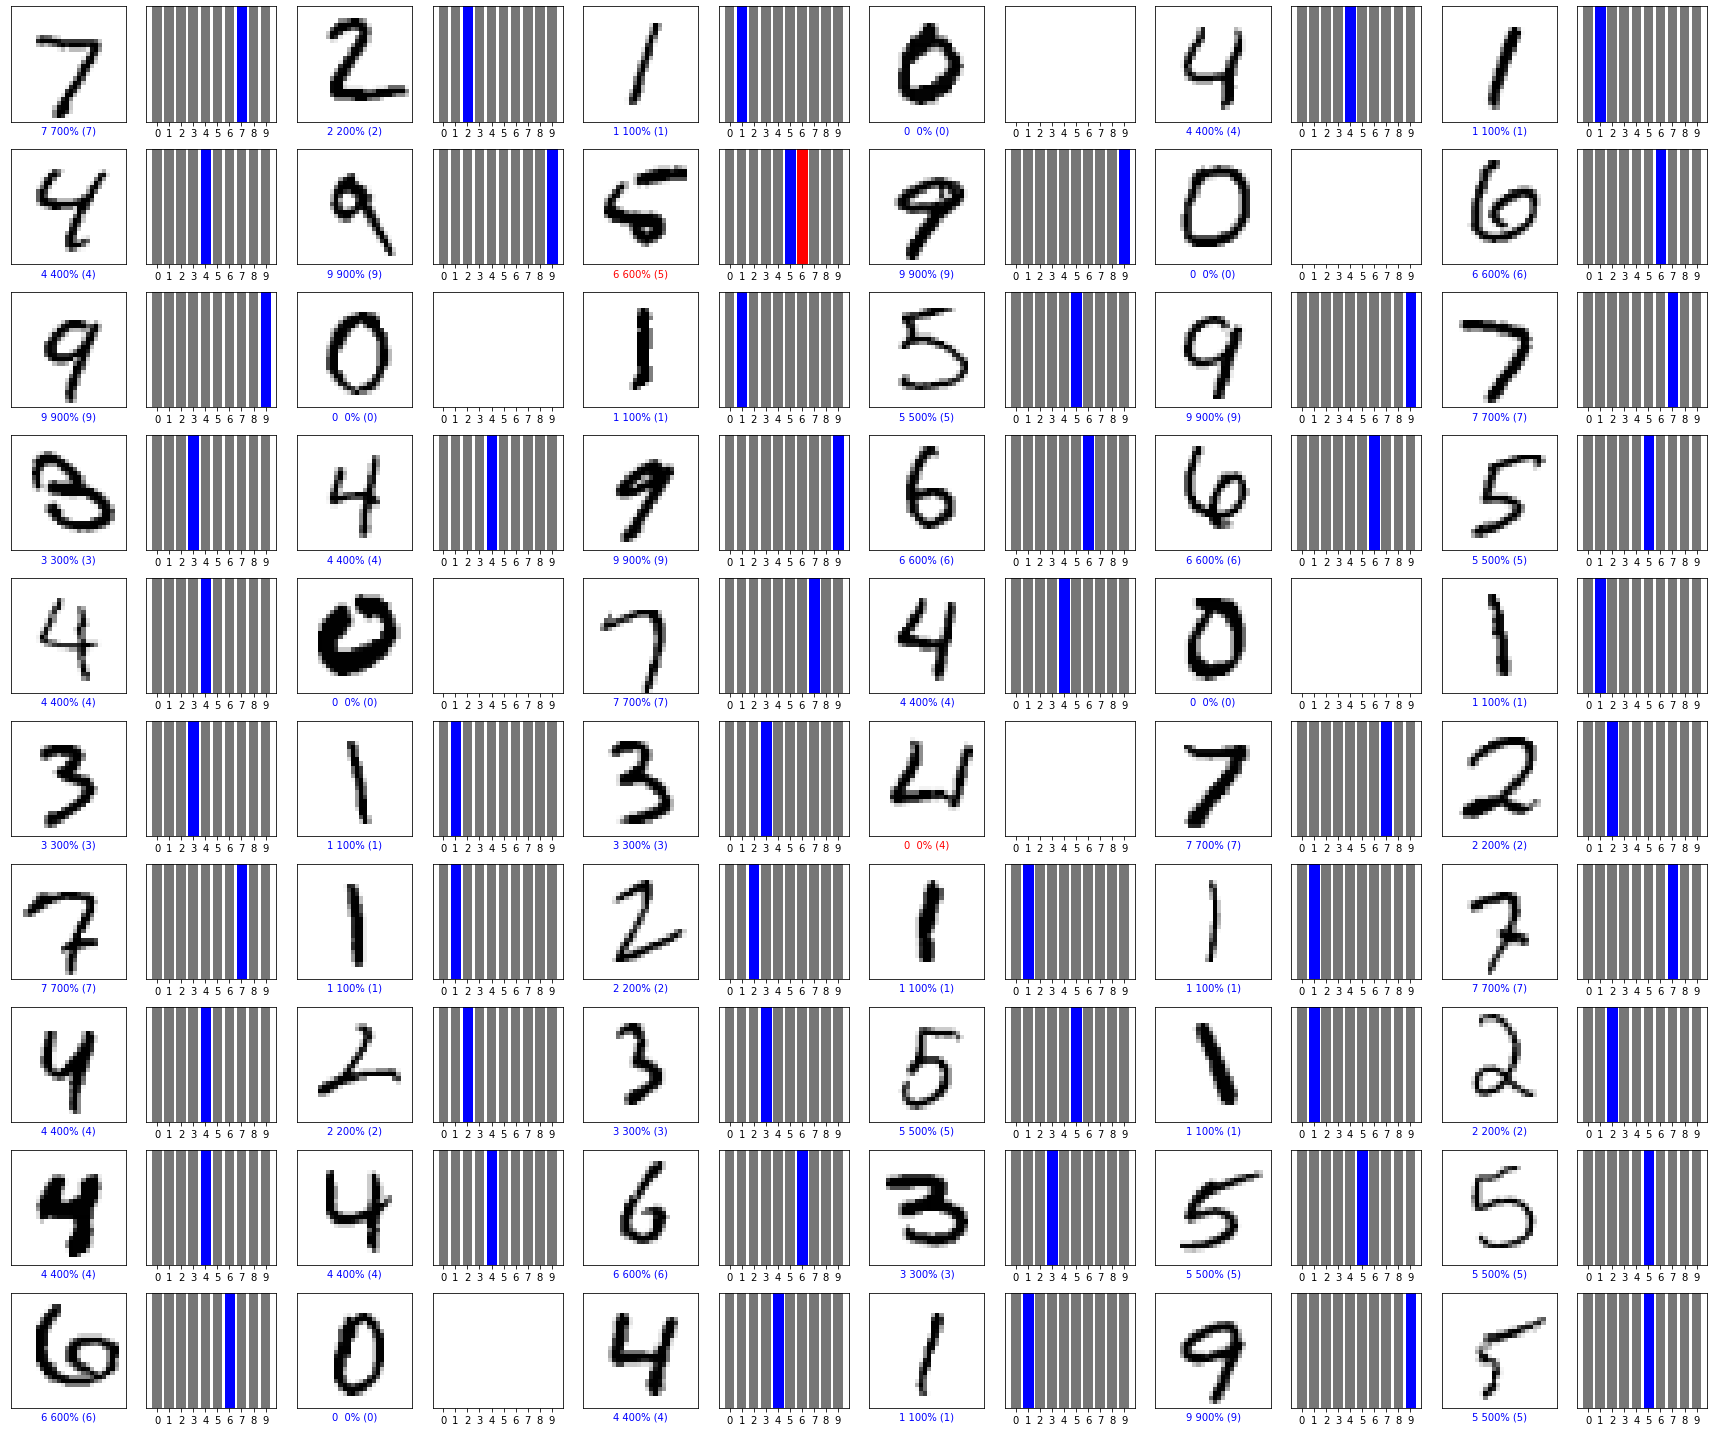

In [ ]:
num_rows = 10
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, test_preds[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, test_preds[i], test_labels)
plt.tight_layout()
plt.show()


In [ ]:
num_rows = 50
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(5*5*num_cols, 5*num_rows))
for i in range(num_images):
  if test_preds[i] != test_labels[i]:
    plt.subplot(num_rows, 5*num_cols, 5*i+5)
    plot_image(i, test_preds[i], test_labels, test_images)
    plt.subplot(num_rows, 5*num_cols, 5*i+7)
    plot_value_array(i, test_preds[i], test_labels)
plt.tight_layout()
plt.show()